In [ ]:
# LeNet-5 - 202p

In [13]:
# 라이브러리
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D,  Dropout, Input
"""
MaxPooling2D : 특성 부각
    풀링 윈도우 내에서 가장 큰 값을 선택하여 다운샘플링합니다. 
    이렇게 하면 주요 특징이 더 강조되고, 중요한 특징들이 더욱 도드라지게 됩니다. 
    특히, 엣지나 텍스처와 같은 뚜렷한 특성들이 잘 보존됩니다.
AveragePooling2D : 공통 특성 부각
    풀링 윈도우 내의 평균 값을 계산하여 다운샘플링합니다. 
    이 방식은 잡음을 줄이고, 이미지에서 공통적으로 나타나는 특성을 더 부각시킵니다. 
    전체적으로 더 부드러운 출력 이미지를 얻게 됩니다.
"""


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'\nMaxPooling2D : 특성 부각\n    풀링 윈도우 내에서 가장 큰 값을 선택하여 다운샘플링합니다. \n    이렇게 하면 주요 특징이 더 강조되고, 중요한 특징들이 더욱 도드라지게 됩니다. \n    특히, 엣지나 텍스처와 같은 뚜렷한 특성들이 잘 보존됩니다.\nAveragePooling2D : 공통 특성 부각\n    풀링 윈도우 내의 평균 값을 계산하여 다운샘플링합니다. \n    이 방식은 잡음을 줄이고, 이미지에서 공통적으로 나타나는 특성을 더 부각시킵니다. \n    전체적으로 더 부드러운 출력 이미지를 얻게 됩니다.\n'

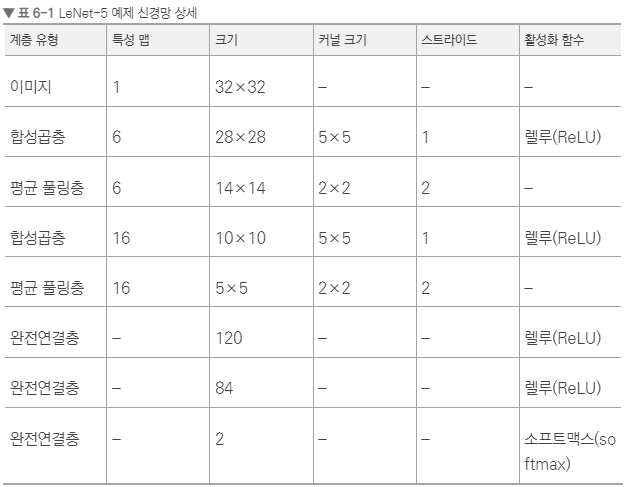

In [14]:
# 모델 클래스 생성
num_classes = 2
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Input(shape=input_shape))
        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [15]:
# LeNet-5 모델 생성
model = LeNet((100, 100, 3), num_classes)
model.summary()

Model: "le_net_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 100, 100, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 50, 50, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 46, 46, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 23, 23, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 120)            │     1,015,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029,006 (3.93 MB)

 Trainable params: 1,029,006 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 파라미터 초기화 및 데이터 호출
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './data/catanddog/train'
valid_dir = './data/catanddog/validation'

In [17]:
# 이미지 데이터 증가
# 훈련 이미지
train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)
train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)
# 검증 이미지
valid = ImageDataGenerator(rescale=1./255)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [18]:
# 텐서보드에서 모델 훈련 과정 살펴보기
log_dir = "./img/log6-1"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=0)

model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
    validation_steps=valid_num // BATCH_SIZE,
    callbacks=[tensorboard_callback],
    verbose=1
)

d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.4699 - loss: 0.8515 - val_accuracy: 0.5000 - val_loss: 0.6949
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6250 - loss: 0.6680 - val_accuracy: 0.4896 - val_loss: 0.7033


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5518 - loss: 0.7107 - val_accuracy: 0.5208 - val_loss: 0.6915
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.6883 - val_accuracy: 0.5417 - val_loss: 0.6907
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5646 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.6833 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4895 - loss: 0.6917 - val_accuracy: 0.5417 - val_loss: 0.6893
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5625 - loss: 0.6919 - val_accuracy: 0.5521 - val_loss: 0.6890
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5644 - loss: 0.6906 - val_accuracy: 0.5104 - val_loss: 0.6907
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5625 - loss: 0.6871 - val_accuracy: 0

In [19]:
%tensorboard --logdir ./img/log6-1/
# http://localhost:6006     * epoch_accuracy(모델에 대한 정확도), epoch_loss(모델에 대한 오차) 확인